# Minimizing Churn Rate

In [53]:
#Header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Loading

In [54]:
#Loading data into jupyter notebook
data_churn=pd.read_csv('data/churn_data.csv')

In [55]:
data_churn.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


# Data Preprocessing

In [56]:
#To display number of rows and columns
data_churn.shape

(27000, 31)

In [57]:
#To hold the null values in each and every columns
data_null=data_churn.isnull().sum()


In [58]:
# To display null values, so that we could handle it
data_null

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [59]:
#Loading the necessary columns
data_machine_churn=data_churn[['age','housing','credit_score','purchases_partners','cc_taken',
                              'app_web_user','payment_type','received_loan','rejected_loan',
                               'left_for_two_month_plus','left_for_one_month','rewards_earned','churn'
                              ]]

In [60]:
#Display top 5 rows in the dataset
data_machine_churn.head()

,age,housing,credit_score,purchases_partners,cc_taken,app_web_user,payment_type,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,churn
0,37.0,na,NaN,0,0,1,Bi-Weekly,0,0,1,0,NaN,0
1,28.0,R,486.0,1,0,1,Weekly,0,0,0,0,44.0,0
2,35.0,R,561.0,86,0,0,Semi-Monthly,0,0,1,0,65.0,0
3,26.0,R,567.0,38,0,0,Bi-Weekly,0,0,0,0,33.0,0
4,27.0,na,NaN,2,0,1,Bi-Weekly,0,0,1,0,1.0,1


In [61]:
#Handling null values in age column by mean value
data_machine_churn['age'].fillna((data_machine_churn['age'].mean()),inplace=True)

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [62]:
#Age column in sorted out
data_null=data_machine_churn.isnull().sum()
data_null

age                           0
housing                       0
credit_score               8031
purchases_partners            0
cc_taken                      0
app_web_user                  0
payment_type                  0
received_loan                 0
rejected_loan                 0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
churn                         0
dtype: int64

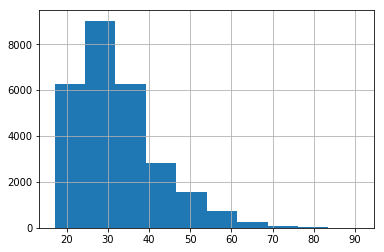

In [63]:
#Historgram to analyze the frequency of age in the data
data_machine_churn.age.hist()

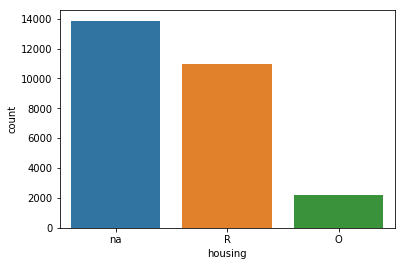

In [64]:
# To determine the count of each type of housing 
# We have to use one hot encoding to this column
sns.countplot(x='housing', data=data_machine_churn)

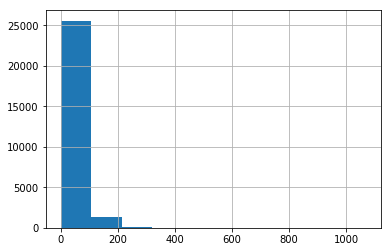

In [65]:
data_machine_churn.purchases_partners.hist()

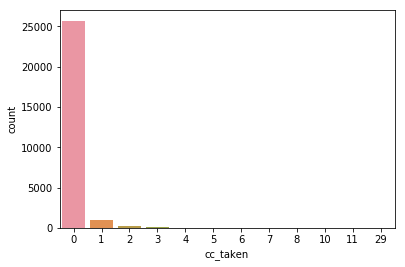

In [66]:
sns.countplot(x='cc_taken', data=data_machine_churn)

In [67]:
data_machine_churn.cc_taken.value_counts()

0     25705
1       923
2       218
3        75
4        45
5        16
6        11
10        2
7         2
29        1
11        1
8         1
Name: cc_taken, dtype: int64

In [68]:
# Handling rare values in the column
data_machine_churn.cc_taken[data_machine_churn.cc_taken>=3]=3

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, se

In [69]:
data_machine_churn.cc_taken.value_counts()

0    25705
1      923
2      218
3      154
Name: cc_taken, dtype: int64

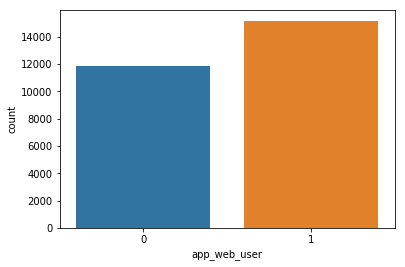

In [70]:

sns.countplot(x='app_web_user', data=data_machine_churn)

In [71]:
#we need to do one hot encoding to fix the categorical variable
data_machine_churn.payment_type.value_counts()

Bi-Weekly       12716
Weekly           5289
na               3899
Monthly          2656
Semi-Monthly     2440
Name: payment_type, dtype: int64

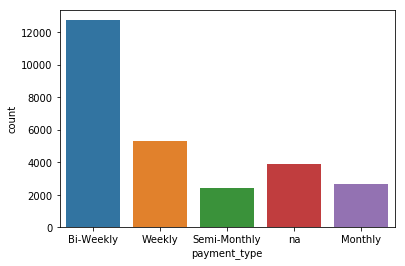

In [72]:
#Bi weekly is prefered by most of the customers
sns.countplot(x='payment_type', data=data_machine_churn)

In [73]:
#One hot encoding-- Creating dummy variables.
data_machine_churn.housing.value_counts()

data_machine_churn=pd.get_dummies(data_machine_churn)
data_machine_churn.columns

Index(['age', 'credit_score', 'purchases_partners', 'cc_taken', 'app_web_user',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'rewards_earned', 'churn', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na'],
      dtype='object')

In [74]:
data_machine_churn.head()

,age,credit_score,purchases_partners,cc_taken,app_web_user,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,churn,housing_O,housing_R,housing_na,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na
0,37.0,NaN,0,0,1,0,0,1,0,NaN,0,0,0,1,1,0,0,0,0
1,28.0,486.0,1,0,1,0,0,0,0,44.0,0,0,1,0,0,0,0,1,0
2,35.0,561.0,86,0,0,0,0,1,0,65.0,0,0,1,0,0,0,1,0,0
3,26.0,567.0,38,0,0,0,0,0,0,33.0,0,0,1,0,1,0,0,0,0
4,27.0,NaN,2,0,1,0,0,1,0,1.0,1,0,0,1,1,0,0,0,0


In [75]:
# We are droping one column from each encoding to prevent from dummy traps which might leading over fitting

data_machine_churn=data_machine_churn.drop(columns=['housing_na','payment_type_na'])

In [76]:
data_machine_churn.head()

,age,credit_score,purchases_partners,cc_taken,app_web_user,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,churn,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly
0,37.0,NaN,0,0,1,0,0,1,0,NaN,0,0,0,1,0,0,0
1,28.0,486.0,1,0,1,0,0,0,0,44.0,0,0,1,0,0,0,1
2,35.0,561.0,86,0,0,0,0,1,0,65.0,0,0,1,0,0,1,0
3,26.0,567.0,38,0,0,0,0,0,0,33.0,0,0,1,1,0,0,0
4,27.0,NaN,2,0,1,0,0,1,0,1.0,1,0,0,1,0,0,0


In [77]:
# Very few got the loan
data_machine_churn.received_loan.value_counts()

0    26509
1      491
Name: received_loan, dtype: int64

In [78]:
# the loan rejected rate is comparevly higher
data_machine_churn.rejected_loan.value_counts()

0    26868
1      132
Name: rejected_loan, dtype: int64

In [79]:
#Customers who left and came back after 2 months is comparetively higher compared to 1 months
data_machine_churn.left_for_two_month_plus.value_counts()

0    22317
1     4683
Name: left_for_two_month_plus, dtype: int64

In [80]:


data_machine_churn.left_for_one_month.value_counts()

0    26512
1      488
Name: left_for_one_month, dtype: int64

In [81]:
data_machine_churn.isnull().sum()

age                             0
credit_score                 8031
purchases_partners              0
cc_taken                        0
app_web_user                    0
received_loan                   0
rejected_loan                   0
left_for_two_month_plus         0
left_for_one_month              0
rewards_earned               3227
churn                           0
housing_O                       0
housing_R                       0
payment_type_Bi-Weekly          0
payment_type_Monthly            0
payment_type_Semi-Monthly       0
payment_type_Weekly             0
dtype: int64

In [82]:
data_machine_churn= data_machine_churn.dropna()

In [83]:
#data_machine_churn['credit_score'].fillna((data_machine_churn['credit_score'].mean()),inplace=True)

In [84]:
#data_machine_churn['rewards_earned'].fillna((data_machine_churn['rewards_earned'].mean()),inplace=True)

In [85]:
data_machine_churn.isnull().sum()

age                          0
credit_score                 0
purchases_partners           0
cc_taken                     0
app_web_user                 0
received_loan                0
rejected_loan                0
left_for_two_month_plus      0
left_for_one_month           0
rewards_earned               0
churn                        0
housing_O                    0
housing_R                    0
payment_type_Bi-Weekly       0
payment_type_Monthly         0
payment_type_Semi-Monthly    0
payment_type_Weekly          0
dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [87]:
X = data_machine_churn.drop(columns=['churn'])
y = data_machine_churn['churn']

In [88]:
data_machine_churn.head()

,age,credit_score,purchases_partners,cc_taken,app_web_user,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,churn,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly
1,28.0,486.0,1,0,1,0,0,0,0,44.0,0,0,1,0,0,0,1
2,35.0,561.0,86,0,0,0,0,1,0,65.0,0,0,1,0,0,1,0
3,26.0,567.0,38,0,0,0,0,0,0,33.0,0,0,1,1,0,0,0
5,32.0,567.0,111,0,1,0,0,0,0,55.0,1,0,1,1,0,0,0
6,21.0,475.0,4,0,0,0,0,0,0,2.0,0,0,0,1,0,0,0


In [89]:
X.head()

,age,credit_score,purchases_partners,cc_taken,app_web_user,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly
1,28.0,486.0,1,0,1,0,0,0,0,44.0,0,1,0,0,0,1
2,35.0,561.0,86,0,0,0,0,1,0,65.0,0,1,0,0,1,0
3,26.0,567.0,38,0,0,0,0,0,0,33.0,0,1,1,0,0,0
5,32.0,567.0,111,0,1,0,0,0,0,55.0,0,1,1,0,0,0
6,21.0,475.0,4,0,0,0,0,0,0,2.0,0,0,1,0,0,0


In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [91]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)


y_pred = logit_model.predict(X_test)


C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
cm=confusion_matrix(y_test,y_pred)

In [93]:

cm

array([[854, 238],
       [360, 326]], dtype=int64)

In [94]:
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import sklearn.svm as svm

from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn import preprocessing,svm,neighbors
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from subprocess import check_output

In [95]:
from sklearn import tree
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
}

In [ ]:
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
